<a href="https://colab.research.google.com/github/aurisaprastika/Linear_Regression/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Multiple Linear Regression atau Regresi Linier Berganda** merupakan analisis yang digunakan untuk mengetahui mengetahui hubungan lebih dari satu variabel bebas terhadap variabel terikat.

Dituliskan dengan **persamaan** sebagai berikut:

## **Y' = a + b1X1 + b2X2 + .... +bnXn**

**a** = intercept

**b** = slope

**X** = variabel bebas

**Y'** = variabel terikat.

Berikut merupakan contoh penggunaan multiple linear regression pada pengamatan pengaruh dan hubungan harga serta pemasangan iklan terhadap penjualan pie.

# **Simple Linear Regression**

In [51]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn import linear_model

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')

In [52]:
# Import Dataset
df = pd.read_csv('https://raw.githubusercontent.com/aurisaprastika/Linear_Regression/main/data/pie-sales.csv', sep =";")
df

,week,pie_sales,price,advertising
0,1,350,5.5,3.3
1,2,460,7.5,3.3
2,3,350,8.0,3.0
3,4,430,8.0,4.5
4,5,350,6.8,3.0
5,6,380,7.5,4.0
6,7,430,4.5,3.0
7,8,470,6.4,3.7
8,9,450,7.0,3.5
9,10,490,5.0,4.0


Table diatas berisikan data-data penjualan kue pie dengan setiap atribut menunjukkan faktor-faktor yang dianggap mempengaruhi penjualan kue pie.

## **Dataset Analysis**
Perlu adanya keterhubungan antar atribut untuk dapat membangun model linear regrasi.

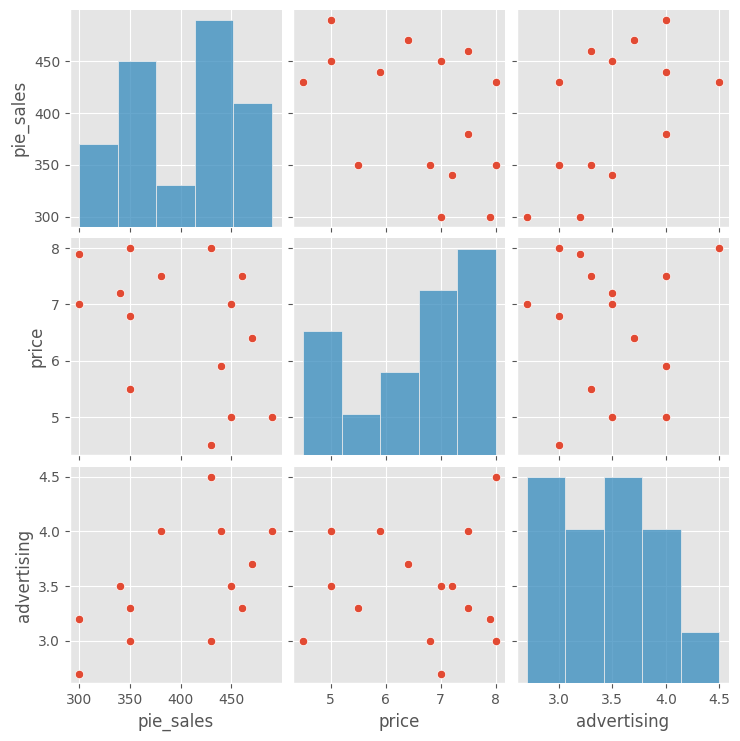

In [53]:
sns.pairplot(df.drop('week', axis=1))

Berdasarkan grafik di atas atribut price dan advertising dianggap sebagai Independent variables (X), dan atribut pie_sales dianggap dianggap sebagai Dependent variable (Y)

Untuk melihat pengaruh X terhadap Y dapat dilihat dari grafik dibawah

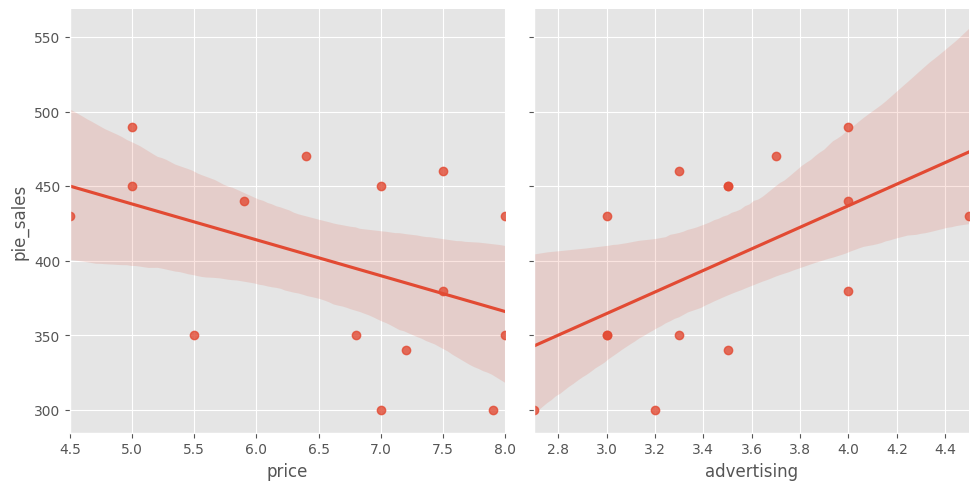

In [54]:
# Visualize the data using scatterplot
g = sns.PairGrid(df, y_vars=["pie_sales"], x_vars=["price", "advertising"], height=5)
g.map(sns.regplot)

*  Hubungan antara atribut price dengan pie_sales memiliki *negative relationship*, berarti semakin tinggi nilai price, maka semakin turun nilai pie_sales.
*  Hubungan antara atribut advertising dengan pie_sales memiliki *positive relationship*, berarti semakin tinggi nilai advertising, maka semakin tinggi pula nilai pie_sales.

# **Regression Using Sklearn**

In [55]:
X = df[['price','advertising']]
Y = df['pie_sales']

In [56]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 306.5261932837436
Coefficients: 
 [-24.97508952  74.13095749]


Berdasarkan hasil, maka diperoleh persamaan sebagai berikut:

**pie_sales = 306.526 - 24.975 (price) + 74.130 (advertising)**



In [58]:
# prediction with sklearn
new_price = 8.0
new_advertising = 3.5
print ('Predicted  Pie_sales: \n', regr.predict([[new_price,new_advertising]]))

Predicted  Pie_sales: 
 [366.18382835]


Dengan menggunakan contoh price = 8.0 dan advertising = 3.5 maka dapat diprediksi bahwa hasil pie sales yaitu 366.184

Sehingga kita dapat melakukan prediksi lain hanya dengan mengganti input variabel.

# **Visualization and Determine R-Square**
R-square menunjukkan besar prosentase variasi variabel independen yang digunakan dalam model mampu menjelaskan variasi variabel dependen

*   R2 = 0 , maka tidak ada hubungan apapun pada ketiga variabel
*   R2 = 1 , maka menunjukan hubungan yang sempurna antar ketiga variabel
*   0 > R2 > 1 , maka ada hubungan antar ketiga variabel, makin tinggi makin kuat


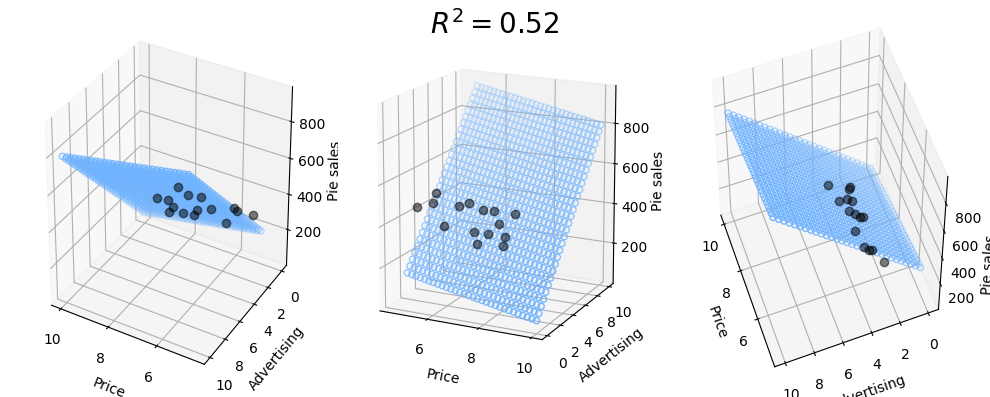

In [59]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

X = df[['price', 'advertising']].values.reshape(-1,2)
Y = df['pie_sales']

# Prepare model data point for visualization 

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(5, 10, 30)
y_pred = np.linspace(0, 10, 30)
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T
predicted = regr.predict(model_viz)
r2 = regr.score(X, Y)

#Visualisasi data dengan grafik 3D
plt.style.use('default')

fig = plt.figure(figsize=(10, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3ff')
    ax.set_xlabel('Price', fontsize=10)
    ax.set_ylabel('Advertising', fontsize=10)
    ax.set_zlabel('Pie sales', fontsize=10)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=30, azim=120)
ax2.view_init(elev=14, azim=-64)
ax3.view_init(elev=50, azim=160)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

# **Regression Using Statsmodels**

In [60]:
X = sm.add_constant(X) # adding a constant

In [61]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              pie_sales   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     6.539
Date:                Fri, 23 Oct 2020   Prob (F-statistic):             0.0120
Time:                        17:45:40   Log-Likelihood:                -77.510
No. Observations:                  15   AIC:                             161.0
Df Residuals:                      12   BIC:                             163.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        306.5262    114.254      2.683      0.0

**Analisis Determinasi R-squared**

Diperoleh nilai R-squared sebesar 0.521. Nilai tersebut berada diantara 0 dan 1, sehingga terdapat hubungan antara X dan Y. Dimana sebanyak 52% variasi Y dipengaruhi oleh variabel X, sedangkan 48% sisanya dipengaruhi variabel lain.

**Autocorrelation dengan Durbin Watson**

H0 : tidak ada autocorrelation

H1 : ada autocorrelation

*   dw < dL maka terdapat autokorelasi
*   dw > dU maka tidak terdapat autokorelasi
*   dL < dw < dU maka pengujian tidak meyakinkan atau tidak dapat disimpulkan

Nilai Durbin-Watson (D) = 1.683

n=15

k=2

Berdasar Tabel Durbin-Watson nilai dL = 0.95 dan dU = 1.54

D > dU maka tidak ada autokorelasi

**Analisis T-test**

T-test berfungsi sebagai penguji pada hubungan data linear antara X dan Y

*Hipotesis*
1.   H0 = tidak ada pengaruh signifikan secara parsial
2.   H1 = adanya pengaruh signifikan secara parsial

*Pengujian*
1.   H0 diterima jika -t tabel < t statistik < t tabel
2.   H0 ditolak jika -t statistik < -t tabel atau t statistik > t tabel

T pada price = -2.306

T-tabel pada price = -2.1788

Artinya H0 diterima atau tidak adanya pengaruh signifikan secara parsial antara price dan advertising terhadap nilai pie_sales

T pada advertising = 2.855

T-tabel pada advertising = 2.1788

Artinya H0 ditolak atau adanya pengaruh signifikan secara parsial antara price dan advertising terhadap nilai pie_sales


**Analisis F-test**

F-test digunakan untuk melihat distribusi F yang memiliki atribut F-Statistic dan probabilitas F-Statistic.

*Hipotesis*
1.   H0 = tidak ada pengaruh secara signifikan secara bersama sama
2.   H1 = adanya pengaruh signifikan secara bersama sama

*Pengujian*
1.   H0 diterima bila F statistik < F tabel
2.   H0 ditolak bila F statistik > F tabel

F-stat = 6.539

F-tabel = 3,885

Df1 = 2

Df2 = 12

Artinya ada pengaruh secara signifikan antara price dan advertising terhadap pie sales